# ___Proyecto Final Machine Learning___
---
>***Auhor's :***
* Daniela Pinzon
* Daniel Oviedo
* Miguel Thomas

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.manifold import TSNE

# ___Dataset Mnis___
---


In [2]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"] / 255.0, mnist["target"]
y = y.astype(np.uint8)  # Convertir etiquetas a enteros

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, shuffle=False)

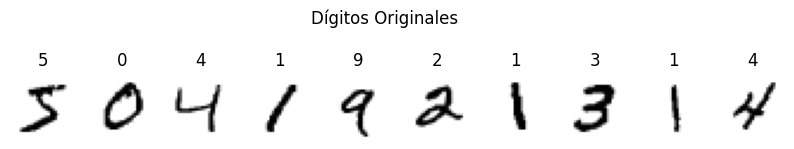

In [4]:
# Visualizar algunos dígitos antes de cualquier procesamiento
def plot_digits(data, labels, title, num_images=10):
    plt.figure(figsize=(10, 2))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(data.iloc[i].values.reshape(28, 28), cmap='binary')
        plt.title(labels.iloc[i])
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

plot_digits(X_train, y_train, "Dígitos Originales")

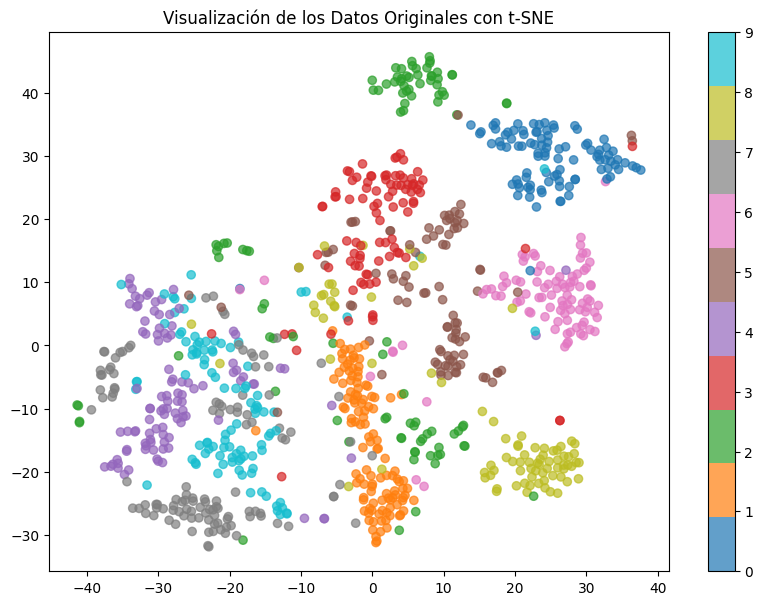

In [5]:
# Visualización de los Datos Originales con t-SNE en 2D
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train[:1000])  # Usamos una muestra de 1000 para rapidez

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train[:1000], cmap="tab10", alpha=0.7)
plt.colorbar(scatter, ticks=range(10))
plt.title("Visualización de los Datos Originales con t-SNE")
plt.show()

## ___Modelo sin PCA___
---

In [6]:
scaler = StandardScaler()  # Crear una instancia de StandardScaler
scaler

StandardScaler()

In [7]:
X_train = scaler.fit_transform(X_train)  # Ajustar y transformar los datos de entrenamiento
X_test = scaler.transform(X_test)  # Transformar los datos de prueba usando el mismo escalador

In [12]:
classifier_no_pca = SVC(kernel="linear" , C = 0.01)  # Crear una instancia del clasificador SVM con kernel lineal
classifier_no_pca.fit(X_train, y_train)  # Entrenar el modelo con los datos de entrenamiento

SVC(C=0.01, kernel='linear')

In [13]:
predicted_no_pca = classifier_no_pca.predict(X_test)  # Hacer predicciones en el conjunto de prueba

In [15]:
# Calcular la exactitud
accuracy_no_pca = accuracy_score(y_test, predicted_no_pca)
print(f"Exactitud del modelo sin PCA: {accuracy_no_pca:.4f}")

Exactitud del modelo sin PCA: 0.9456


In [18]:
# Reporte de clasificación
print("Reporte de clasificación sin PCA")
print(classification_report(y_test, predicted_no_pca))

Reporte de clasificación sin PCA
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.94      0.94      0.94      1032
           3       0.92      0.95      0.93      1010
           4       0.94      0.96      0.95       982
           5       0.92      0.90      0.91       892
           6       0.96      0.95      0.96       958
           7       0.96      0.94      0.95      1028
           8       0.93      0.91      0.92       974
           9       0.95      0.92      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.94      0.94     10000
weighted avg       0.95      0.95      0.95     10000



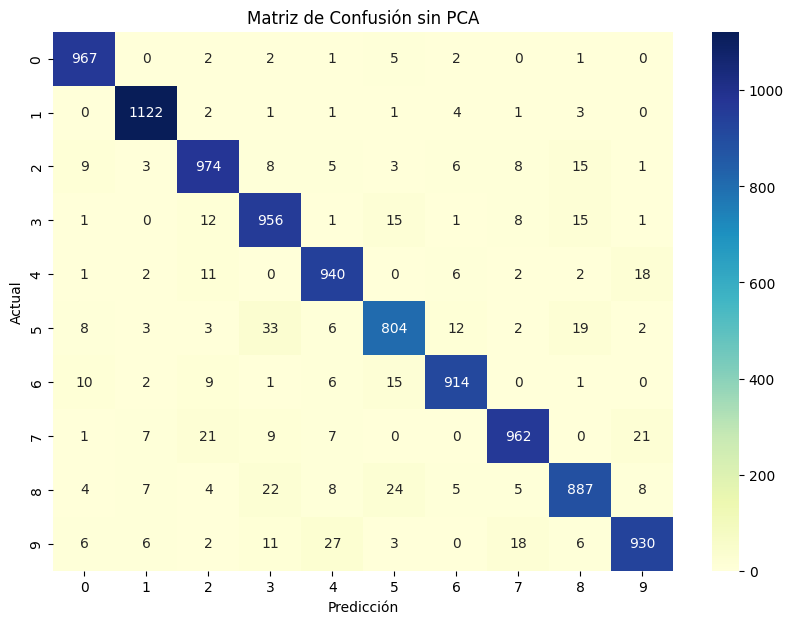

In [22]:
# Matriz de confusión
conf_matrix_no_pca = confusion_matrix(y_test, predicted_no_pca)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix_no_pca, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Predicción")
plt.ylabel("Actual")
plt.title("Matriz de Confusión sin PCA")
plt.show()

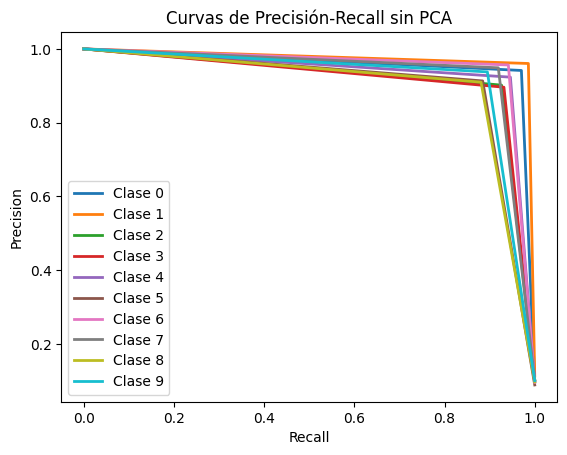

In [ ]:
# Curvas de Precisión-Recall sin PCA
precision = dict()
recall = dict()
for i in range(10):
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, y_pred_no_pca == i)
    plt.plot(recall[i], precision[i], lw=2, label='Clase {}'.format(i))

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curvas de Precisión-Recall sin PCA")
plt.legend(loc="best")
plt.show()

## ___Modelo con PCA___
---

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# Aplicar PCA para reducir la dimensionalidad
pca = PCA(n_components=0.95)  # Retener el 95% de la varianza
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

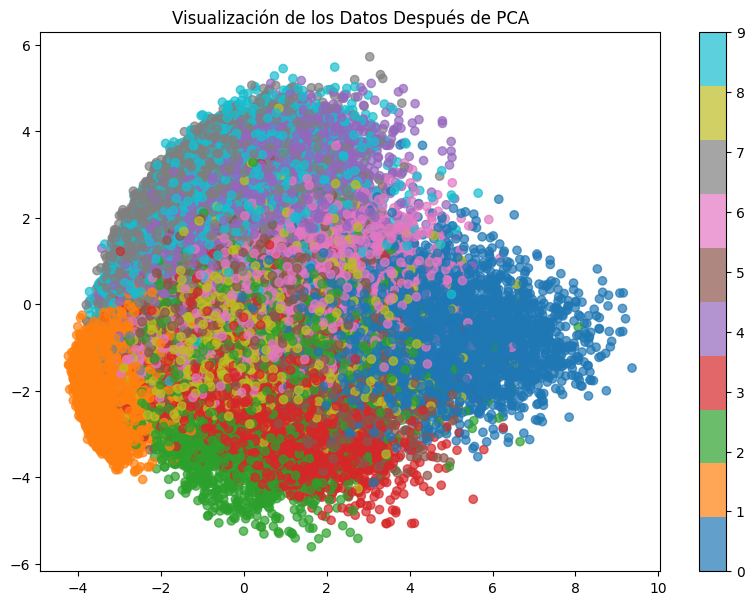

In [ ]:
# Visualización de los Datos Después de PCA en 2D
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap="tab10", alpha=0.7)
plt.colorbar(scatter, ticks=range(10))
plt.title("Visualización de los Datos Después de PCA")
plt.show()

In [ ]:
# Entrenar el modelo SVM con reducción de dimensionalidad
svm_clf_pca = SVC(kernel='linear', C=1.0)
svm_clf_pca.fit(X_train_pca, y_train)

SVC(kernel='linear')

In [ ]:
# Predicciones
y_pred_pca = svm_clf_pca.predict(X_test_pca)

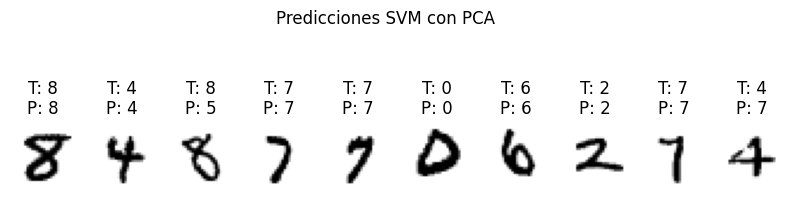

In [ ]:
# Visualizar las predicciones para algunos dígitos
plot_predictions(pd.DataFrame(X_test), pd.Series(y_test), y_pred_pca, "Predicciones SVM con PCA")

In [ ]:
# Calcular la exactitud
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Exactitud del modelo con PCA: {accuracy_pca:.4f}")

Exactitud del modelo con PCA: 0.9393


In [ ]:
# Reporte de clasificación
print("Reporte de clasificación con PCA")
print(classification_report(y_test, y_pred_pca))

Reporte de clasificación con PCA
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1343
           1       0.96      0.98      0.97      1600
           2       0.92      0.94      0.93      1380
           3       0.91      0.92      0.92      1433
           4       0.93      0.94      0.94      1295
           5       0.91      0.90      0.91      1273
           6       0.97      0.96      0.96      1396
           7       0.94      0.96      0.95      1503
           8       0.94      0.89      0.92      1357
           9       0.93      0.91      0.92      1420

    accuracy                           0.94     14000
   macro avg       0.94      0.94      0.94     14000
weighted avg       0.94      0.94      0.94     14000



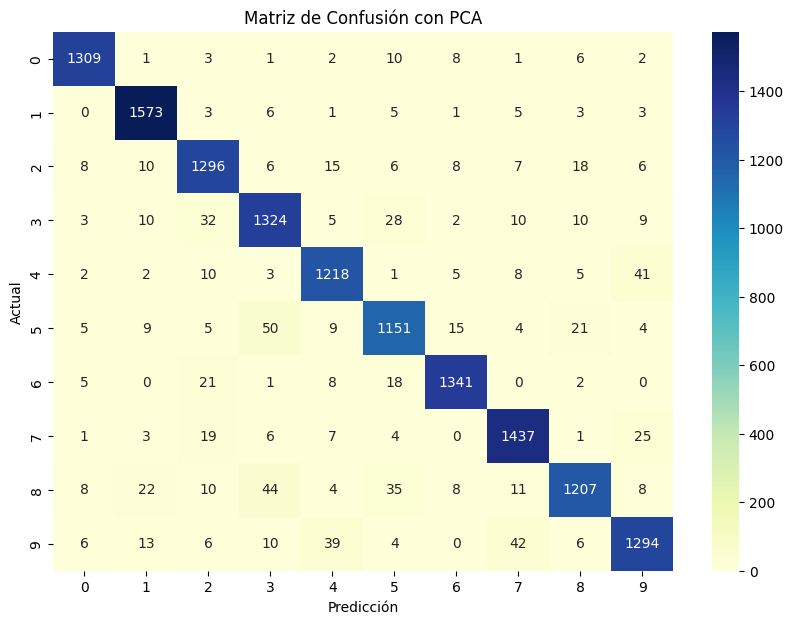

In [ ]:
# Matriz de confusión
conf_matrix_pca = confusion_matrix(y_test, y_pred_pca)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix_pca, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Predicción")
plt.ylabel("Actual")
plt.title("Matriz de Confusión con PCA")
plt.show()

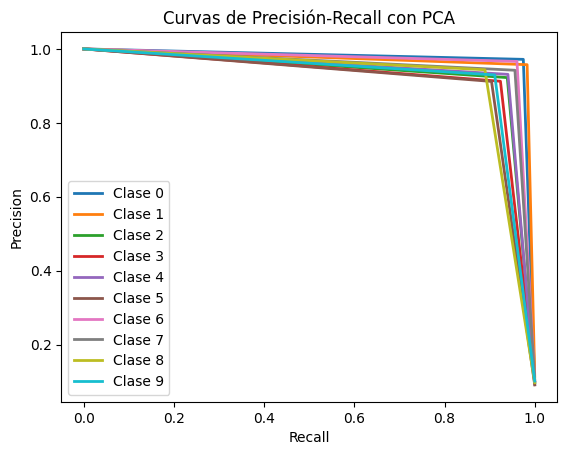

In [ ]:
# Curvas de Precisión-Recall con PCA
precision_pca = dict()
recall_pca = dict()
for i in range(10):
    precision_pca[i], recall_pca[i], _ = precision_recall_curve(y_test == i, y_pred_pca == i)
    plt.plot(recall_pca[i], precision_pca[i], lw=2, label='Clase {}'.format(i))

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curvas de Precisión-Recall con PCA")
plt.legend(loc="best")
plt.show()

## ___Pruebas Unitarias___
---

In [ ]:
from PIL import Image

In [ ]:
# Función para cargar y preprocesar imágenes
def load_and_preprocess_image(image_path):
    image = Image.open(image_path).convert('L')
    image = image.resize((28, 28), Image.ANTIALIAS)
    image_array = np.array(image).reshape(1, -1)
    image_array = 255 - image_array  # Invertir los colores
    return image_array

In [ ]:
# Cargar las imágenes
image_paths = ['0.jpg', '2.jpg', '2n.jpg', '3.jpg', '4.jpg', '5.jpg' , '9.jpg']
test_images = np.vstack([load_and_preprocess_image(img) for img in image_paths])
test_images= test_images/255

<ipython-input-27-575be08c820e>:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize((28, 28), Image.ANTIALIAS)


In [ ]:
np.max(test_images)

1.0

In [ ]:
# Predecir con el modelo sin PCA
predictions_no_pca = svm_clf_no_pca.predict(test_images)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


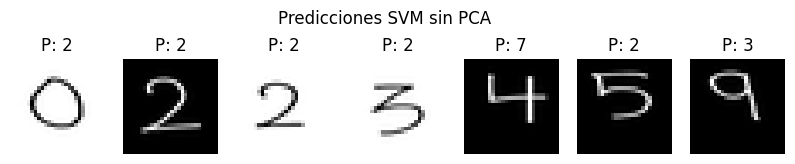

In [ ]:
# Visualizar las predicciones para algunos dígitos
def plot_predictions(images, predictions, title):
    plt.figure(figsize=(10, 2))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"P: {predictions[i]}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

plot_predictions(test_images, predictions_no_pca, "Predicciones SVM sin PCA")


In [ ]:
# Resultados
print("Predicciones sin PCA:", predictions_no_pca)
print("Predicciones con PCA:", predictions_pca)